#### Basic of Stock Exchange https://www.youtube.com/watch?v=OXwZtlcTiuk

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


In [99]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , LSTM



In [101]:
# Loading data set
data = pd.read_csv("tesla.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [102]:
data.shape

(1692, 7)

In [103]:
data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


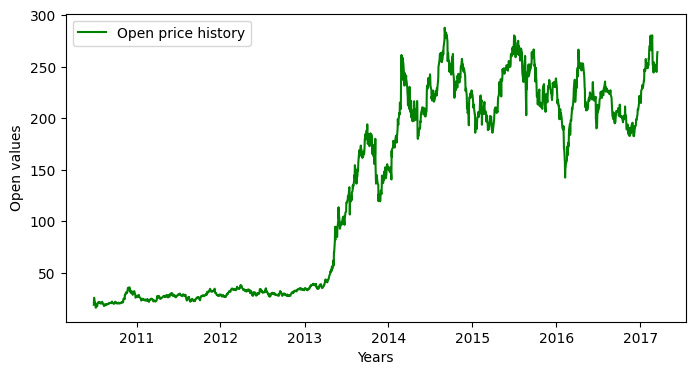

In [104]:
# Analysis the opening prices

data["Date"] = pd.to_datetime(data['Date'],format="%m/%d/%Y")
plt.figure(figsize=(8,4))
plt.plot(data["Date"],data['Open'],label='Open price history',color="green")
plt.xlabel("Years")
plt.ylabel("Open values")
plt.legend()


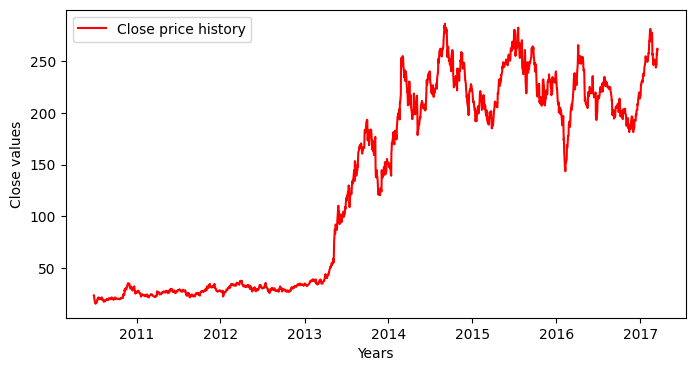

In [105]:
# Analysis the closing prices

data["Date"] = pd.to_datetime(data['Date'],format="%m/%d/%Y")
plt.figure(figsize=(8,4))
plt.plot(data["Date"],data['Close'],label='Close price history',color="red")
plt.xlabel("Years")
plt.ylabel("Close values")
plt.legend()


In [106]:
print('Total number of days :   ',data.shape[0])
print('Total number of Attributes   :',data.shape[1])

Total number of days :    1692
Total number of Attributes   : 7


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [108]:
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


<AxesSubplot:>

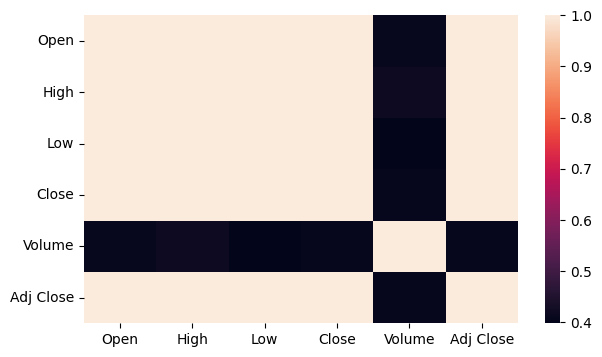

In [109]:
plt.figure(figsize =(7,4))
sns.heatmap(data.corr())

In [110]:
data.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999623,0.999605,0.999233,0.407515,0.999233
High,0.999623,1.000000,0.999521,0.999691,0.416466,0.999691
Low,0.999605,0.999521,1.000000,0.999656,0.397615,0.999656
Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000
Volume,0.407515,0.416466,0.397615,0.406907,1.000000,0.406907
Adj Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000


In [111]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [112]:
data.isnull().values.any()

False

In [113]:
# drop extra columns

datadrop = data.drop(data[['Volume', 'Adj Close']],axis=1)

In [114]:
datadrop.head()

,Date,Open,High,Low,Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001


<AxesSubplot:>

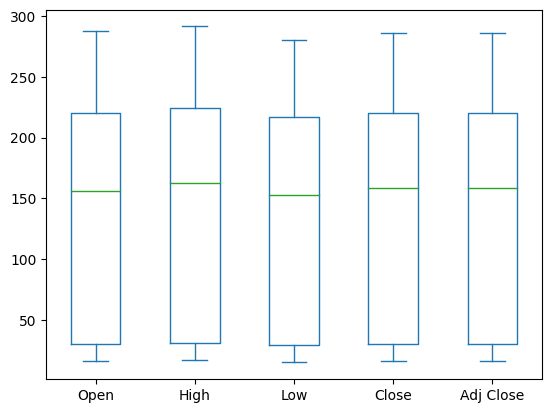

In [115]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [116]:
# # setting the layout for ourplot

# layout = go.Layout(
#         title='Stock prices of Tesla',
#         xaxis=dict(
#             title = 'Date',
#             titlefont=dict(
#             family='Courier New, monospace',
#             size = 18,
#             color= '#7f7f7f'
#             )
#         ),yaxis=dict(
#                     title = 'Price',
#                     titlefont=dict(
#                     family='Courier New, monospace',
#                     size = 18,
#                     color= '#7f7f7f'
#                     )
#                 )
# )
    
# tesla_data = [{'x':data['Date'],'y':data['Close']}]
# plot = go.Figure(data=tesla_data,layout=layout)
    
    
    

In [117]:
# #plot() plot# plotting offline
# import chart_studio.plotly as py
# from plotly.offline import plot
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# init_notebook_mode(connected=True)
# iplot(plot)

In [118]:
monthvise = data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order,axis=0)

monthvise

,Open,Close
Date,,
January,127.491490,127.552553
February,134.073259,134.293927
March,135.026713,134.736784
April,130.263920,130.387360
May,131.002441,130.980709
June,140.413693,140.824616
July,132.262230,132.327500
August,132.950967,133.070064
September,139.863403,139.653611


In [119]:
from itertools import cycle
names = cycle(['Stock High Price','Stock Close Price'])
fig = px.line(data, x=data['Date'], y=[data['High'],data['Close']],labels={'Date':'Date','value':'Stock value'}, width=970,
    height=600)
fig.update_layout(title_text='Stock analysis chart', font_size=12, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

In [120]:
## build the model LSTM


In [121]:
#Sort the dataset on date time and filter “Date” and “Close” columns
close_data = data[['Date','Close']]
print("Shape of close dataframe:", close_data.shape)

Shape of close dataframe: (1692, 2)


In [122]:
# normalizing using MinMax Scaler
del close_data['Date']
scaler=MinMaxScaler(feature_range=(0,1))
close_data=scaler.fit_transform(np.array(close_data).reshape(-1,1))
print(close_data.shape)

(1692, 1)


In [123]:
train_data = close_data[0:1300,:]
test_data = close_data[1300:,:]

In [124]:
print("train_data:",train_data.shape)
print("test_data:",test_data.shape)

train_data: (1300, 1)
test_data: (392, 1)


In [125]:
#Now we Transform the Close price based on Time-series-analysis forecasting requirement 
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [133]:
time_step = 15
X_train ,Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [134]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1284, 15, 1)
X_test:  (376, 15, 1)


In [135]:
#Build and train the LSTM model
# model=Sequential()
# model.add(LSTM(10,input_shape=(None,1),activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(1))

In [136]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(None,1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [137]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 50)          10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.compile(loss="mean_squared_error",optimizer="adam")
lstm = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 2s 27ms/step - loss: 0.0476 - val_loss: 0.0195
Epoch 2/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 3/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 4/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 6/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 7/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 8/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0023
Epoch 9/100
21/21 [==============================] - 0s 8ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 10/100
21/21 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 11

Epoch 80/100
21/21 [==============================] - 0s 8ms/step - loss: 6.2372e-04 - val_loss: 7.7290e-04
Epoch 81/100
21/21 [==============================] - 0s 8ms/step - loss: 4.4727e-04 - val_loss: 8.3017e-04
Epoch 82/100
21/21 [==============================] - 0s 8ms/step - loss: 4.6050e-04 - val_loss: 7.5704e-04
Epoch 83/100
21/21 [==============================] - 0s 8ms/step - loss: 4.5144e-04 - val_loss: 9.1535e-04
Epoch 84/100
21/21 [==============================] - 0s 8ms/step - loss: 4.6511e-04 - val_loss: 7.9387e-04
Epoch 85/100
21/21 [==============================] - 0s 8ms/step - loss: 5.4418e-04 - val_loss: 0.0016
Epoch 86/100
21/21 [==============================] - 0s 8ms/step - loss: 9.4260e-04 - val_loss: 0.0011
Epoch 87/100
21/21 [==============================] - 0s 8ms/step - loss: 4.5720e-04 - val_loss: 9.4632e-04
Epoch 88/100
21/21 [==============================] - 0s 8ms/step - loss: 4.9624e-04 - val_loss: 8.5201e-04
Epoch 89/100
21/21 [================

In [139]:
model.evaluate(X_test,Y_test)


12/12 [==============================] - 0s 2ms/step - loss: 6.1982e-04


0.0006198219489306211

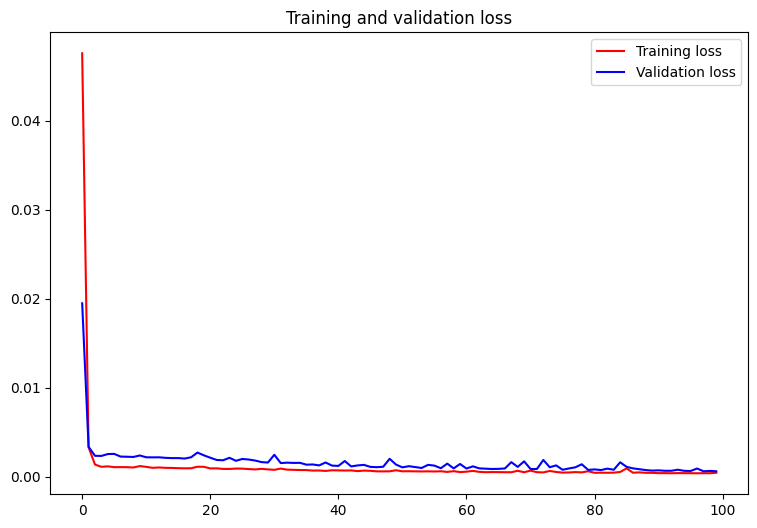

<Figure size 640x480 with 0 Axes>

In [140]:
loss = lstm.history['loss']
val_loss = lstm.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(9,6));
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [141]:
model.evaluate(X_train,Y_train)


41/41 [==============================] - 0s 2ms/step - loss: 3.6640e-04


0.0003663995594251901

In [142]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

12/12 [==============================] - 0s 2ms/step


((1284, 1), (376, 1))

In [143]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_Ytrain = scaler.inverse_transform(Y_train.reshape(-1,1)) 
original_Ytest = scaler.inverse_transform(Y_test.reshape(-1,1))

In [144]:
# Evaluation metrices RMSE and MAE
import math
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_Ytrain,train_predict))) #root mean square error
print("Train data MSE: ", mean_squared_error(original_Ytrain,train_predict)) #mean square error
print("Train data MAE: ", mean_absolute_error(original_Ytrain,train_predict)) #mean absolute error
print("--  --  --")
print("--  --  --")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_Ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_Ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_Ytest,test_predict))
print("--  --  --")
print("--  --  --")
### Variance Regression Score
from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:", 
      explained_variance_score(original_Ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_Ytest, test_predict))


Train data RMSE:  5.172816883291509
Train data MSE:  26.75803450806568
Train data MAE:  3.1090296530287316
--  --  --
--  --  --
Test data RMSE:  6.727955866614238
Test data MSE:  45.265390143108945
Test data MAE:  5.081854080623547
--  --  --
--  --  --
Train data explained variance regression score: 0.9968021148580993
Test data explained variance regression score: 0.9232461787724673


In [ ]:
#Plotting the Actual and Predicted Prices for Google Stocks.

plt.plot(original_Ytest,color="red",label="Actual")
plt.plot(test_predict,color="green",label="Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()